# Data Cleaning

### Reading the Data

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns
import plotly.express as px
import pickle as pkl

dataset = "male_players (legacy)_23"
dataset = "female_players_23"
df = pd.read_csv('Data/'+dataset+'.csv')
print(len(df))

181361


C:\Users\DELL\AppData\Local\Temp\ipykernel_19468\360946562.py:11: DtypeWarning: Columns (17,20,21,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/'+dataset+'.csv')


### Taking a look at the dataset

In [57]:
df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,...,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,...,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,...,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,...,61+3,61+3,63+3,60+3,56+3,56+3,56+3,60+3,20+3,https://cdn.sofifa.net/players/227/310/23_120.png
4,227246,/player/227246/lucy-bronze/230009,23,9,2023-01-13,L. Bronze,Lucia Roberta Tough Bronze,RB,89,89,...,86+3,86+3,87+2,87+2,87+2,87+2,87+2,87+2,20+3,https://cdn.sofifa.net/players/227/246/23_120.png


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181361 entries, 0 to 181360
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 152.2+ MB


### Handling Nulls

<Axes: >

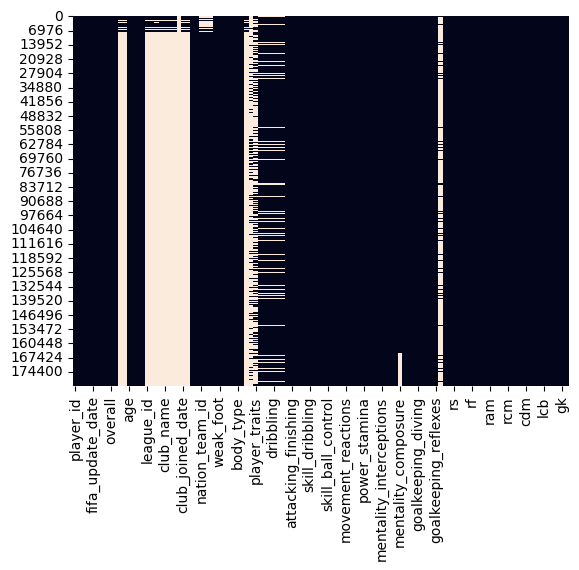

In [59]:
sns.heatmap(df.isnull(), cbar = False)
# Data has lots of missing values

In [61]:
# Total number of nulls = 1218702 in male_players (legacy)_23.csv
# Total number of nulls = 2883528 in female_players_23.csv
df.isnull().sum().sum()

2883528

In [62]:
# Nulls in each column
nulls = df.isnull().sum() 
print(nulls[nulls > 0])

value_eur                         176530
wage_eur                          176530
league_id                         176485
league_name                       176485
league_level                      176576
club_team_id                      176485
club_name                         176485
club_position                     176485
club_jersey_number                176485
club_loaned_from                  181280
club_joined_date                  176657
club_contract_valid_until_year    176576
nation_team_id                      3997
nation_position                     3997
nation_jersey_number                3997
release_clause_eur                176611
player_tags                       151198
player_traits                     109593
pace                               22741
shooting                           22741
passing                            22741
dribbling                          22741
defending                          22741
physic                             22741
mentality_compos

In [63]:
# Showing it as percentages
print(nulls[nulls > 0] / len(df) * 100)

value_eur                         97.336252
wage_eur                          97.336252
league_id                         97.311440
league_name                       97.311440
league_level                      97.361616
club_team_id                      97.311440
club_name                         97.311440
club_position                     97.311440
club_jersey_number                97.311440
club_loaned_from                  99.955338
club_joined_date                  97.406278
club_contract_valid_until_year    97.361616
nation_team_id                     2.203892
nation_position                    2.203892
nation_jersey_number               2.203892
release_clause_eur                97.380914
player_tags                       83.368530
player_traits                     60.428096
pace                              12.539080
shooting                          12.539080
passing                           12.539080
dribbling                         12.539080
defending                       

In [68]:
# Check nulls in pace, shooting, passing, dribbling, defending, physic
# Check if they are the same rows
print("Number of all nulls:", df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].iloc[:].isnull().all(axis = 1).sum())
# print("Number of rows:",df[df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].iloc[:].isnull().all(axis = 1)]['player_positions'].count())
print("Number of any nulls:",df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].iloc[:].isnull().any(axis = 1).sum())
# All of them are null in the same rows. So we could drop them

print("Number of goal keepers:", len(df[df['player_positions'] == 'GK']))
# We notice all of them are goal keepers, except 6 in the case of females
# print those 6
print(df[df['player_positions'] != 'GK'][['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].iloc[:].isnull().all(axis = 1))


Number of all nulls: 22741
Number of any nulls: 22741
Number of goal keepers: 22735
0         False
1         False
2         False
3         False
4         False
          ...  
181356    False
181357    False
181358    False
181359    False
181360    False
Length: 158626, dtype: bool


In [51]:
# Handling a few nulls
'''
11.120601 +  88.879399 = 100
'pace' -----> 'goalkeeping_speed'
'shooting' -----> 'goalkeeping_kicking
'passing' -----> 20
'dribbling' -----> 22
'defending' -----> 14
'physic' -----> 64          # mean instead of min, as GK's aren't that bad
'''
# el goalkeepers lyhom scores msh lel la3eeba el tanya, fa hn-merge el 2 columns basically
df['pace'] = df[['pace', 'goalkeeping_speed']].max(axis = 1)
df['shooting'] = df[['shooting', 'goalkeeping_kicking']].max(axis = 1)

# fy 7agat tanya mne2darsh n3mlha merge, fa hna5od el min aw mean 3la asas en el GK msh byb2a gamed fl 7war dh
df['passing'].fillna(df['passing'].min(), inplace = True)
df['dribbling'].fillna(df['dribbling'].min(), inplace = True)
df['defending'].fillna(df['defending'].min(), inplace = True)
df['physic'].fillna(df['physic'].mean(), inplace = True)

In [52]:
# We can't do this before the previous cell, because we use some of the dropped columns to fill the nulls

# Drop columns with more than 33% missing values
# thresh: minimum number of non-NA values to keep the column
df = df.dropna(thresh = 2 * len(df) / 3, axis = 1)
nulls = df.isnull().sum() 
print(nulls[nulls > 0] / len(df) * 100)

nation_team_id          13.235294
nation_position         13.235294
nation_jersey_number    13.235294
mentality_composure      8.479349
dtype: float64


In [53]:
# Check nulls in 'league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number'
# Check if they are the same rows, msh rows mo5tlfa
print("Number of all null rows:", df[['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number']].iloc[:].isnull().all(axis = 1).sum())
print("Number of any null rows:", df[['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number']].iloc[:].isnull().any(axis = 1).sum())
# tl3 3adad el rows el kolaha null = 3adad el nulls mn kol column fyhom, y3ny nafs el rows
# All of them are null in the same rows. So we could drop them without losing much data

# Calculate percentage of nulls in these columns
# print(df[['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number']].iloc[:].isnull().all(axis = 1).sum() / len(df) * 100)

# Drop these empty rows
df = df.dropna(subset = ['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number'])

KeyError: "None of [Index(['league_id', 'league_name', 'club_team_id', 'club_name',\n       'club_position', 'club_jersey_number'],\n      dtype='object')] are in the [columns]"

In [ ]:
# We notice league level has only a few nulls, so we can drop them
print("Number of nulls in league_level:", df['league_level'].isnull().sum())
df = df.dropna(subset = ['league_level'])

Number of nulls in league_level: 944


In [ ]:
# This has been handled, making this cell obsolete. But it would work for other datasets

# Check nulls in 'gk'
print(df['gk'].isnull().sum())
# Check if there is null in 'gk' and position == goalkeeper
print(df['player_positions'][df['gk'].isnull()].str.contains('GK').sum())
# Some of them are goalkeepers


0
0


In [ ]:
# Set df['gk'] nulls to the average of  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'

df.loc[df['gk'].isnull(), 'gk'] = df[df['gk'].isnull()][['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']].mean(axis = 1)

In [ ]:
# See a few rows where 'value_eur' is null
df[df['value_eur'].isnull()].head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
530,3622,/player/3622/ricardo-alberto-silv-de-carvalho/...,15,2,2014-09-18,Ricardo Carvalho,Ricardo Alberto Silveira de Carvalho,CB,77,77,...,69+1,69+1,64+1,69+1,76+1,76+1,76+1,69+1,16+1,https://cdn.sofifa.net/players/003/622/15_120.png
532,26992,/player/26992/sylvain-distin/150002,15,2,2014-09-18,S. Distin,Sylvain Distin,CB,77,77,...,71,71,67,72,77,77,77,72,11,https://cdn.sofifa.net/players/026/992/15_120.png
559,153260,/player/153260/vitorino-hilton-da-silva/150002,15,2,2014-09-18,Hilton,Vitorino Hilton da Silva,CB,77,77,...,73,73,70,73,77,77,77,73,14,https://cdn.sofifa.net/players/153/260/15_120.png
688,23461,/player/23461/walter-samuel/150002,15,2,2014-09-18,W. Samuel,Walter Adrián Samuel Luján,CB,76,76,...,67,67,60,66,76,76,76,66,11,https://cdn.sofifa.net/players/023/461/15_120.png
1163,10764,/player/10764/juan-francisco-garcia-garcia/150002,15,2,2014-09-18,Juanfran,Juan Francisco García García,"CB, LB",74,74,...,70,70,70,72,74,74,74,72,11,https://cdn.sofifa.net/players/010/764/15_120.png


In [ ]:
# get the type of columns that have nulls
df.dtypes[nulls[nulls > 0].index]

value_eur                         float64
wage_eur                          float64
league_id                         float64
league_name                        object
league_level                      float64
club_team_id                      float64
club_name                          object
club_position                      object
club_jersey_number                float64
club_joined_date                   object
club_contract_valid_until_year    float64
mentality_composure               float64
dtype: object

In [ ]:
# Taking a look at some players
df['value_eur'].describe()

# get player with max value
# df[df['value_eur'] == df['value_eur'].max()]

# get 5 players with max value
df.nlargest(5, 'value_eur')


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
123817,231747,/player/231747/kylian-mbappe/220002,22,2,2021-09-23,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png
143054,231747,/player/231747/kylian-mbappe/230002,23,2,2022-09-26,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/23_120.png
104935,231747,/player/231747/kylian-mbappe/210002,21,2,2020-09-23,K. Mbappé,Kylian Mbappé Lottin,"ST, LW, RW",90,95,...,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/21_120.png
143078,239085,/player/239085/erling-haaland/230002,23,2,2022-09-26,E. Haaland,Erling Braut Haaland,ST,88,94,...,64+3,64+3,62+3,61+3,62+3,62+3,62+3,61+3,19+3,https://cdn.sofifa.net/players/239/085/23_120.png
123840,239085,/player/239085/erling-haaland/220002,22,2,2021-09-23,E. Haaland,Erling Braut Haaland,ST,88,93,...,63+3,63+3,62+3,60+3,60+3,60+3,60+3,60+3,19+3,https://cdn.sofifa.net/players/239/085/22_120.png


In [ ]:
df['mentality_composure'].describe()
# get nulls in 'mentality_composure'
df['mentality_composure'].isnull().sum()

31931

In [ ]:
from sklearn.impute import KNNImputer
# Filling the nulls with KNN imputer
# bye7seb KNN w yshoof a2rab nas w ya5od el avg bta3hom
imputer = KNNImputer(missing_values=np.nan, n_neighbors=3)
df['mentality_composure'] = imputer.fit_transform(df[['mentality_composure']])

In [ ]:
# print column names of type object
df.select_dtypes(include = 'object').columns

Index(['player_url', 'fifa_update_date', 'short_name', 'long_name',
       'player_positions', 'dob', 'league_name', 'club_name', 'club_position',
       'club_joined_date', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type', 'real_face', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object')

In [ ]:
# Checking some columns to see which to drop

# df['player_url']            # drop
# df['long_name']             # drop
# df['fifa_update_date']      # drop
# df['club_joined_date']      # drop
# df['real_face']             # drop
# df['player_face_url']       # drop
# df['dob']                   # drop

# drop the above attributes
df = df.drop(columns = ['player_url', 'long_name', 'fifa_update_date', 'club_joined_date', 'real_face', 'player_face_url','dob'])


In [ ]:
# print(df['long_name'].str.split('+').str[0])
# print(df['gk'].isnull().sum())
# get id of some null gk
print(df[df['gk'].isnull()]['player_id'])


Series([], Name: player_id, dtype: int64)


In [ ]:
# loop on all the position attrributes and evaluate the cell
positions = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

for col in positions:
    # if it has + or - in it, evaluate the expression
    df[col] = df[col].apply(lambda x: eval(x) if isinstance(x, str) else x)




In [ ]:
# drop null values in 'value_eur' as they are very few, or we can use them for testing
# df = df.dropna(subset = ['value_eur'])

In [ ]:
# Get number of nulls
if df.isnull().sum().sum() == 0:
    print("No nulls left. EZZZZ")

### Handling Duplicates

In [ ]:
# Checking for duplicates
df.duplicated().sum()
# No duplicates found

0

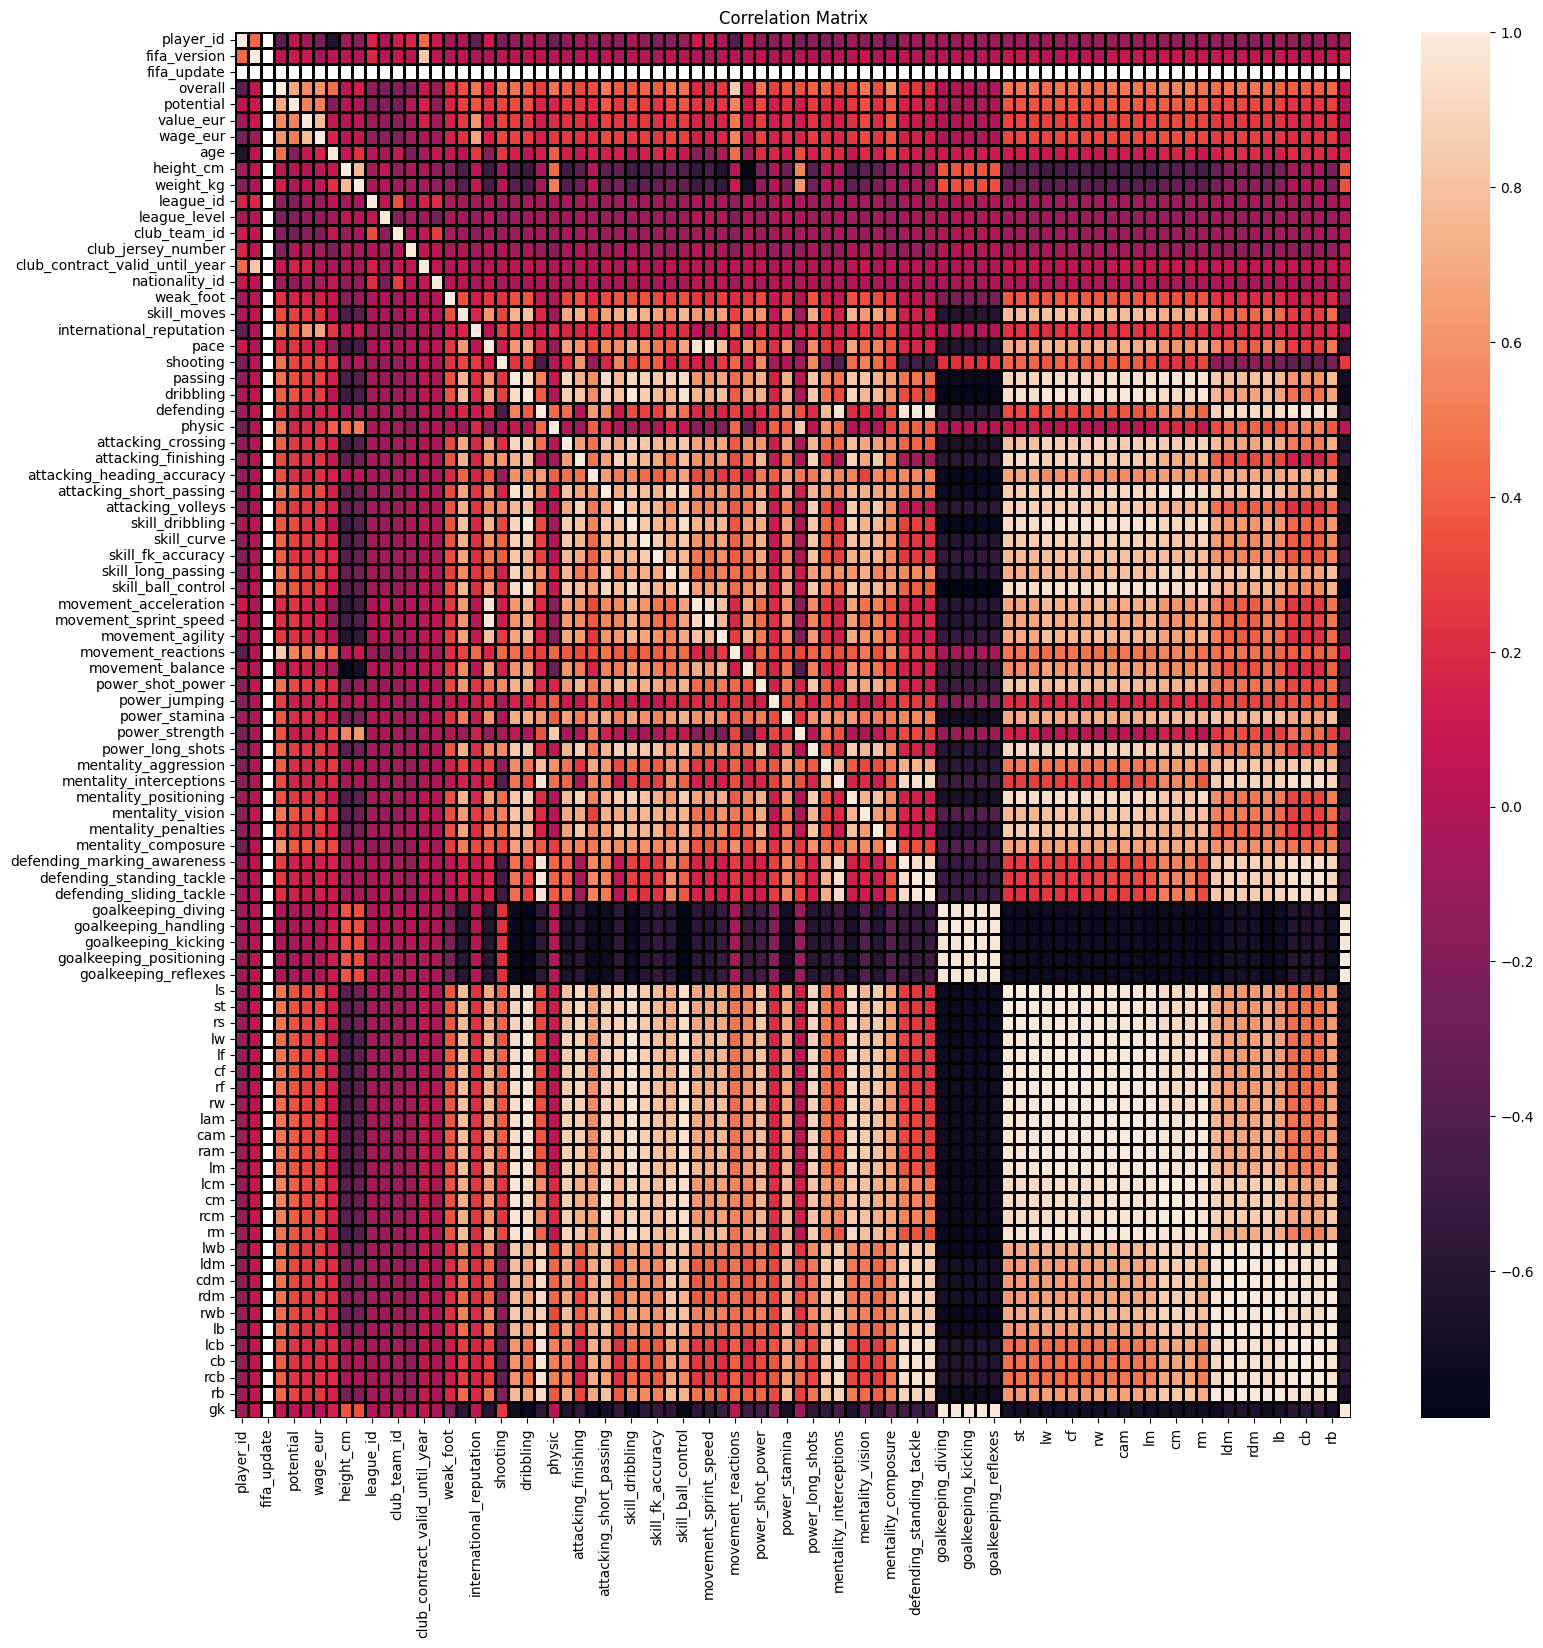

In [ ]:
# making a heatmap of the correlation matrix
df2 = df.copy()
# dropping the categorical columns
df2 = df2.drop(columns = ['short_name', 'player_positions', 'league_name', 'club_name',
       'club_position', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type'])

plt.figure(figsize=(18,18))
sns.heatmap(df2.corr(), cbar = True, linewidths=1, linecolor='black')
# sns.heatmap(df2.corr(), annot= False, cmap='jet')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# 'fifa_update', 'fifa_version': Both of these columns are not useful, as they are not related any other column
print(df['fifa_update'].value_counts())
df = df.drop(columns = ['fifa_update'])
# but we won't drop fifa_version because we use it for analysis
# Notice fifa_update only has value 2

fifa_update
2    158866
Name: count, dtype: int64


# Preprocessing

In [ ]:
df.select_dtypes(include = 'object').columns

Index(['short_name', 'player_positions', 'league_name', 'club_name',
       'club_position', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type'],
      dtype='object')

In [ ]:
df['work_rate'].value_counts()

work_rate
Medium/Medium    87335
High/Medium      27382
Medium/High      14277
High/High         7784
Medium/Low        7679
High/Low          6333
Low/Medium        3980
Low/High          3769
Low/Low            327
Name: count, dtype: int64

In [ ]:
# We can split work rate into 2 columns: Attack and Defend
df['work_rate_attack'] = df['work_rate'].str.split('/').str[0]
df['work_rate_defend'] = df['work_rate'].str.split('/').str[1]

# Drop the original column
df = df.drop(columns = ['work_rate'])

# Get values of the new columns to make sure they are correct
print(df['work_rate_attack'].value_counts(), "\n")
print(df['work_rate_defend'].value_counts())




work_rate_attack
Medium    109291
High       41499
Low         8076
Name: count, dtype: int64 

work_rate_defend
Medium    118697
High       25830
Low        14339
Name: count, dtype: int64


In [ ]:
# Now we can one hot encode these columns
# Note that splitting them then one hot encoding them is better than one hot encoding the original column
# this produces 6 columns instead of 9 (linearly dependent (2n) instead of exponentially dependent (n^2))
df = pd.get_dummies(df, columns = ['work_rate_attack', 'work_rate_defend'])
# The types are bool, we can convert them to int
df['work_rate_attack_Low'] = df['work_rate_attack_Low'].astype(int)
df['work_rate_attack_Medium'] = df['work_rate_attack_Medium'].astype(int)
df['work_rate_attack_High'] = df['work_rate_attack_High'].astype(int)
df['work_rate_defend_Low'] = df['work_rate_defend_Low'].astype(int)
df['work_rate_defend_Medium'] = df['work_rate_defend_Medium'].astype(int)
df['work_rate_defend_High'] = df['work_rate_defend_High'].astype(int)




In [ ]:
len(df.columns)
# The length of the columns has increased by 5 (6-1)

99

In [ ]:
# ['short_name', 'player_positions', 'league_name', 'club_name',
    #    'club_position', 'nationality_name', 'preferred_foot', 'body_type']
print("Before:", df['body_type'].value_counts())
# No need to look at height here, as there is another column for it
df['body_type'] = df['body_type'].str.split().str[0]
print("\n\nAfter:", df['body_type'].value_counts())

Before: body_type
Normal (170-185)    55808
Lean (170-185)      34580
Normal (185+)       33175
Lean (185+)         16355
Normal (170-)        5504
Stocky (170-185)     5179
Lean (170-)          3718
Stocky (185+)        3203
Stocky (170-)         907
Unique                437
Name: count, dtype: int64


After: body_type
Normal    94487
Lean      54653
Stocky     9289
Unique      437
Name: count, dtype: int64


In [ ]:
# One hot encode
df = pd.get_dummies(df, columns = ['body_type'])
df['body_type_Lean'] = df['body_type_Lean'].astype(int)
df['body_type_Normal'] = df['body_type_Normal'].astype(int)
df['body_type_Stocky'] = df['body_type_Stocky'].astype(int)
df['body_type_Unique'] = df['body_type_Unique'].astype(int)


In [ ]:
# Change value of left to 0 and right to 1
print(df['preferred_foot'].value_counts())
df['preferred_foot'] = df['preferred_foot'].apply(lambda x: 0 if x == 'Left' else 1)
print(df['preferred_foot'].value_counts())

preferred_foot
Right    121587
Left      37279
Name: count, dtype: int64
preferred_foot
1    121587
0     37279
Name: count, dtype: int64


# 3ayzeen nb2a n3ml type encoding 3la ay feature kda

In [ ]:
df.describe()

,player_id,fifa_version,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_id,...,work_rate_attack_High,work_rate_attack_Low,work_rate_attack_Medium,work_rate_defend_High,work_rate_defend_Low,work_rate_defend_Medium,body_type_Lean,body_type_Normal,body_type_Stocky,body_type_Unique
count,158866.000000,158866.000000,158866.000000,158866.000000,1.585810e+05,158866.000000,158866.000000,158866.000000,158866.000000,158866.000000,...,158866.000000,158866.000000,158866.000000,158866.000000,158866.000000,158866.000000,158866.000000,158866.000000,158866.000000,158866.000000
mean,214527.914053,19.142535,65.658536,70.738931,2.326804e+06,10858.744162,25.089931,181.244074,75.226115,211.207691,...,0.261220,0.050835,0.687945,0.162590,0.090258,0.747152,0.344019,0.594759,0.058471,0.002751
std,34988.592350,2.561783,7.052763,6.266821,6.018702e+06,21962.307385,4.667724,6.747477,6.999496,445.883183,...,0.439301,0.219662,0.463334,0.368992,0.286553,0.434646,0.475049,0.490940,0.234632,0.052376
min,2.000000,15.000000,40.000000,40.000000,1.000000e+03,500.000000,16.000000,154.000000,49.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199199.000000,17.000000,61.000000,66.000000,3.250000e+05,2000.000000,21.000000,176.000000,70.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,220668.000000,19.000000,66.000000,70.000000,7.250000e+05,4000.000000,25.000000,181.000000,75.000000,56.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,237055.000000,21.000000,70.000000,75.000000,1.800000e+06,10000.000000,28.000000,186.000000,80.000000,308.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,271817.000000,23.000000,94.000000,95.000000,1.940000e+08,575000.000000,54.000000,208.000000,110.000000,2149.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158866 entries, 0 to 161582
Columns: 102 entries, player_id to body_type_Unique
dtypes: float64(14), int32(10), int64(72), object(6)
memory usage: 118.8+ MB


In [ ]:
# get type of first 50 columns
df.dtypes[:50]

player_id                           int64
fifa_version                        int64
short_name                         object
player_positions                   object
overall                             int64
potential                           int64
value_eur                         float64
wage_eur                          float64
age                                 int64
height_cm                           int64
weight_kg                           int64
league_id                         float64
league_name                        object
league_level                      float64
club_team_id                      float64
club_name                          object
club_position                      object
club_jersey_number                float64
club_contract_valid_until_year    float64
nationality_id                      int64
nationality_name                   object
preferred_foot                      int64
weak_foot                           int64
skill_moves                       

In [ ]:
df.dtypes[49:]

power_strength                   int64
power_long_shots                 int64
mentality_aggression             int64
mentality_interceptions          int64
mentality_positioning            int64
mentality_vision                 int64
mentality_penalties              int64
mentality_composure            float64
defending_marking_awareness      int64
defending_standing_tackle        int64
defending_sliding_tackle         int64
goalkeeping_diving               int64
goalkeeping_handling             int64
goalkeeping_kicking              int64
goalkeeping_positioning          int64
goalkeeping_reflexes             int64
ls                               int64
st                               int64
rs                               int64
lw                               int64
lf                               int64
cf                               int64
rf                               int64
rw                               int64
lam                              int64
cam                      

In [ ]:
len(df2.columns)

86

In [ ]:
# Saving the dataset
df.to_csv('Data/Preprocessed/Clean_'+dataset+'.csv', index = False)